Data Analytics & Visualization Project Questions

1. Load the dataset and display the first five rows.

2. Check for missing values. If any exist, suggest how to handle them.

3. Are there duplicate records? If so, remove them.

4. Convert categorical variables (e.g., Job Title, Education Level) into a format suitable for analysis.

5. Identify and handle any outliers in the Monthly Salary column.

6. What is the average salary per department? Show this using a bar chart.

7. How does education level affect salary? Create a visualization to support your answer.

8. Is there a correlation between work experience and monthly salary? Use a scatter plot to visualize.

9. Does gender impact salary? Compare average salaries for each gender.

10. Which department has the highest proportion of remote workers?

11. Perform ANOVA to test :

    - Whether work experience influences the salary amount for the employees.

    - Whether education level influences the salary amount for the employees.

    - The interaction effect for Education Level and Work Experience  on the salary.

12. Create a box plot showing salary distributions across different job titles.

13. Develop a heatmap to visualize correlations among numeric variables.

14. What key factors influence salary levels in this dataset?

15. What insights can HR use to improve salary structures and hiring policies?

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Load the dataset and display the first five rows.

In [4]:
# Loading data
df = pd.read_csv("employee_salary_data.csv")

# Displaying the first five rows
df.head()

,Employee_ID,Age,Gender,Education_Level,Work_Experience,Job_Title,Department,Monthly_Salary,Performance_Score,Remote_Work_Percentage,City
0,1001,50,Male,Bachelor,9,Manager,Marketing,80000.0,8,25,Nakuru
1,1002,36,Female,Bachelor,16,Data Scientist,Operations,69000.0,9,25,Eldoret
2,1003,29,Female,Bachelor,9,Analyst,Marketing,48000.0,3,0,Kisumu
3,1004,42,Female,Bachelor,16,Consultant,Finance,91000.0,10,0,Kisumu
4,1005,40,Female,Bachelor,19,Manager,Finance,64000.0,3,25,Nairobi


### Check for missing values

In [6]:
# Checking for missing values
df.isna().sum()

Employee_ID               0
Age                       0
Gender                    0
Education_Level           0
Work_Experience           0
Job_Title                 0
Department                0
Monthly_Salary            0
Performance_Score         0
Remote_Work_Percentage    0
City                      0
dtype: int64

### Are there duplicate records?

In [8]:
# Checking for duplicates
df.duplicated().sum()

0

### Convert categorical variables (e.g., Job Title, Education Level) into a format suitable for analysis

In [10]:
# Checking the data types of features
df.dtypes

Employee_ID                 int64
Age                         int64
Gender                     object
Education_Level            object
Work_Experience             int64
Job_Title                  object
Department                 object
Monthly_Salary            float64
Performance_Score           int64
Remote_Work_Percentage      int64
City                       object
dtype: object

### Identify and handle any outliers in the Monthly Salary column.

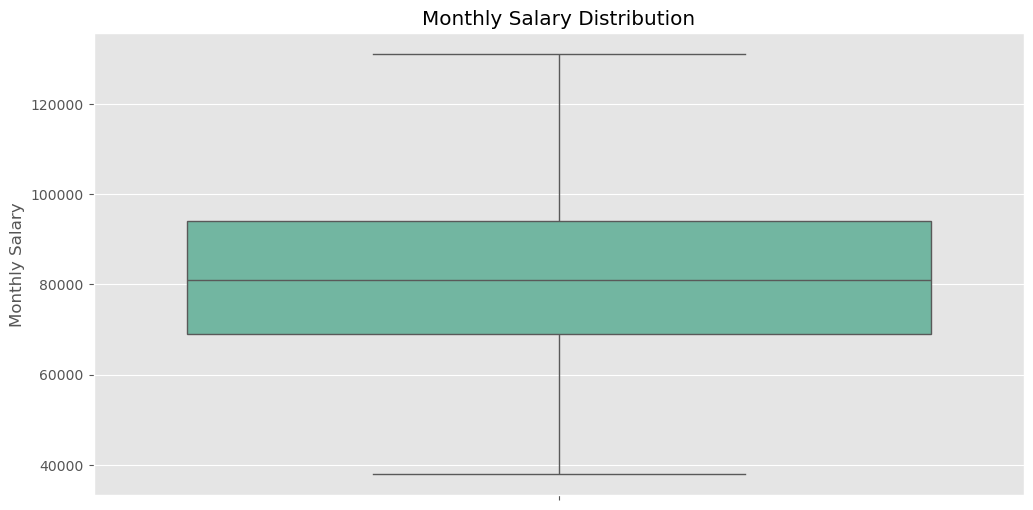

In [12]:
# Setting the size of the visualization
plt.figure(figsize=(12,6))

# Plotting a box plot for checking the distribution
sns.boxplot(y=df['Monthly_Salary'], palette="Set2")

# adding the title and labels
plt.title('Monthly Salary Distribution')
plt.ylabel('Monthly Salary')

plt.show()

## Observations
- No missing values in the dataset.
- no duplicates in the dataset.
- No outliers in the dataset.
- All columns are in the correct format.

### What is the average salary per department?

In [14]:
df.groupby("Department")["Monthly_Salary"].describe()

,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
Finance,50.0,79540.000000,16905.753157,39000.0,71000.0,78000.0,91000.0,114000.0
HR,40.0,81625.000000,17909.584170,43000.0,69000.0,82500.0,95500.0,120000.0
IT,39.0,83102.564103,16776.855724,43000.0,74000.0,82000.0,95500.0,129000.0
Marketing,31.0,88225.806452,24464.545336,38000.0,78000.0,88000.0,105000.0,131000.0
Operations,40.0,78400.000000,17450.001837,50000.0,64750.0,78000.0,90250.0,115000.0


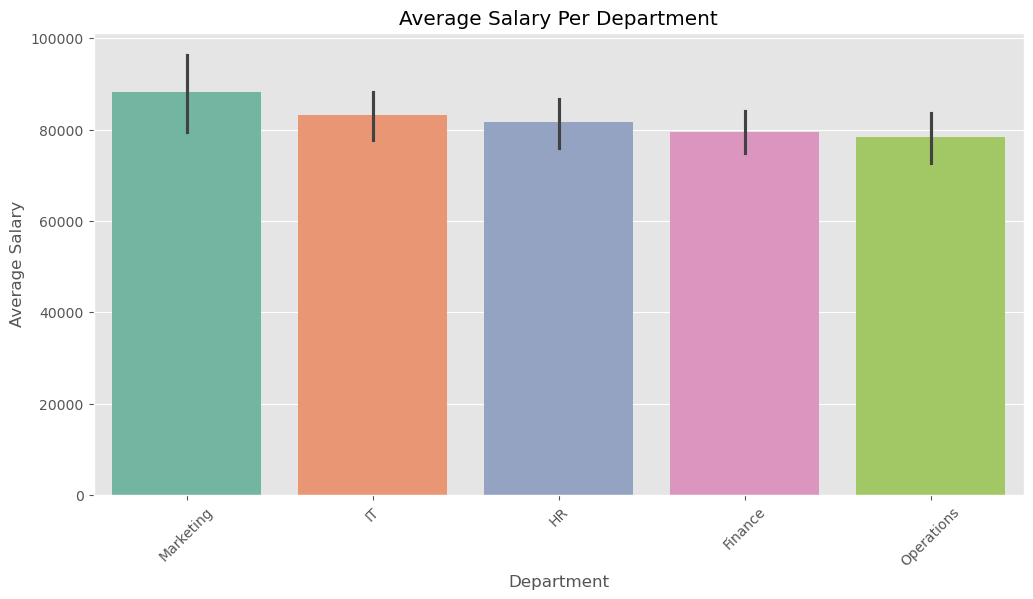

In [15]:
# Setting the size of the visualization
plt.figure(figsize=(12,6))

# plotting a bar plot
sns.barplot(data=df, x="Department", y="Monthly_Salary", palette="Set2",
           order=df.groupby("Department")["Monthly_Salary"].mean().sort_values(ascending=False).index)

# Adding title and labels
plt.title("Average Salary Per Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)

plt.show()

### Observation
The marketing department has the highest average monthly  salary compared to the other departments whereas the operetions department has the lowest average  monthly salary 

### How does education level affect salary

In [17]:
df.groupby("Education_Level")["Monthly_Salary"].describe()

,count,mean,std,min,25%,50%,75%,max
Education_Level,,,,,,,,
Bachelor,109.0,80917.431193,20088.290509,39000.0,68000.0,80000.0,94000.0,131000.0
Diploma,43.0,80418.604651,17944.667013,38000.0,68500.0,81000.0,90000.0,120000.0
Master,36.0,84111.111111,16019.234470,50000.0,76500.0,82000.0,94250.0,123000.0
PhD,12.0,87333.333333,14430.607203,66000.0,73250.0,91000.0,100000.0,104000.0


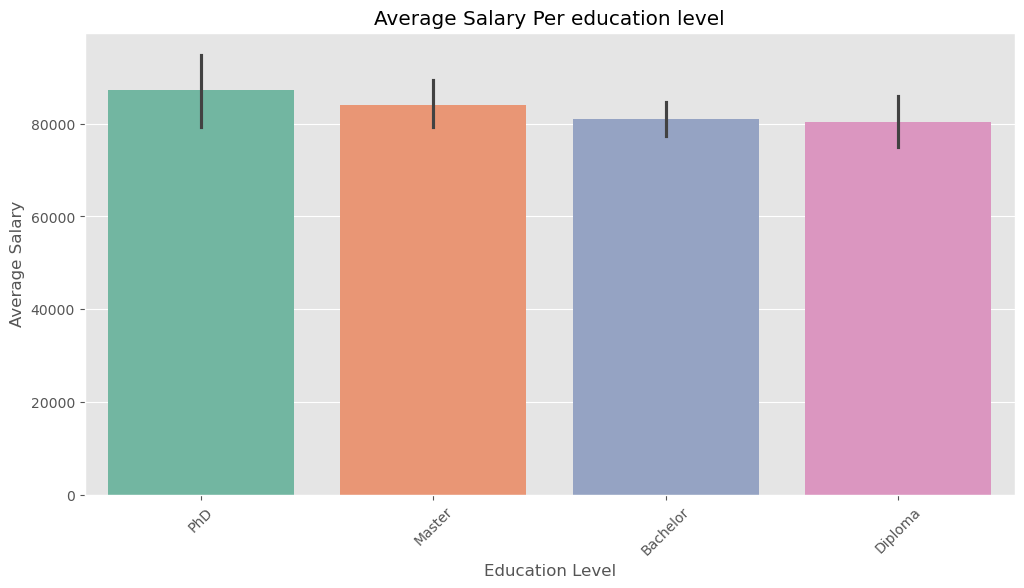

In [18]:
# Setting the size of the visualization
plt.figure(figsize=(12,6))

# plotting a bar plot
sns.barplot(data=df, x="Education_Level", y="Monthly_Salary", palette="Set2",
           order=df.groupby("Education_Level")["Monthly_Salary"].mean().sort_values(ascending=False).index)

# Adding title and labels
plt.title("Average Salary Per education level")
plt.xlabel("Education Level")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)

plt.show()

### Observation
People with a PhD have the highest average monthly salary compared to those with other education levels while those with a Diploma have the lowest average monthly salary.

### Is there a correlation between work experience and monthly salary?

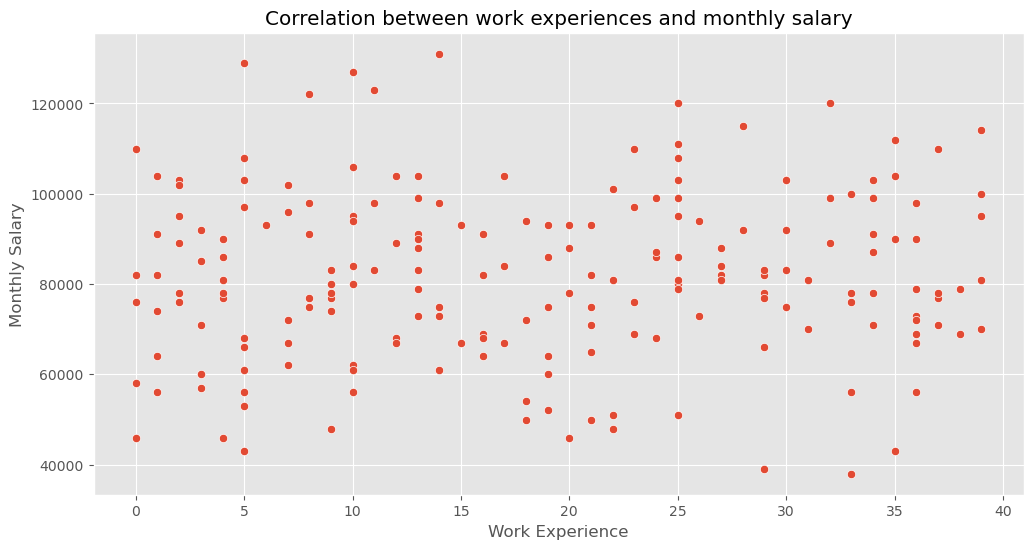

In [20]:
# Setting the size of the visualization
plt.figure(figsize=(12,6))

# correlation between work experience and monthly salary using scatter plot
sns.scatterplot(data=df, x="Work_Experience", y="Monthly_Salary")

# Adding title and labels
plt.title("Correlation between work experiences and monthly salary")
plt.xlabel("Work Experience")
plt.ylabel("Monthly Salary")
plt.show()

### Observation
There is no correlation between work experience and monthly salary meaning that the number of years of experience does not influence salary levels.

### Does gender impact salary? Compare average salaries for each gender.


In [22]:
df.Gender.value_counts()

Gender
Male      96
Female    92
Other     12
Name: count, dtype: int64

In [23]:
df.groupby("Gender")["Monthly_Salary"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,92.0,83239.130435,18135.854576,38000.0,71000.0,82500.0,94250.0,127000.0
Male,96.0,79229.166667,19115.427314,39000.0,67750.0,78000.0,93250.0,131000.0
Other,12.0,90833.333333,15543.682337,61000.0,82750.0,89500.0,103250.0,120000.0


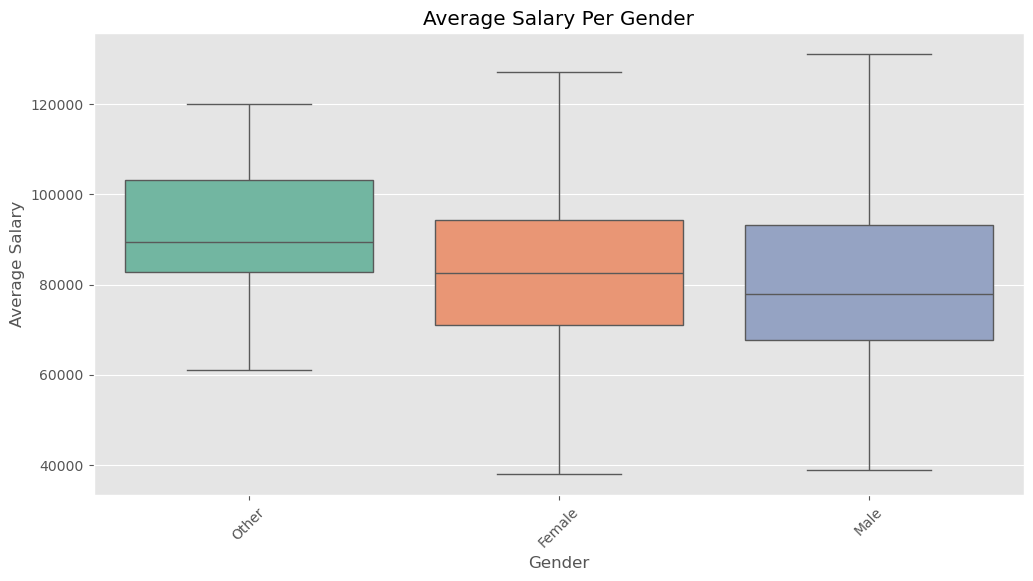

In [24]:
# Setting the size of the visualization
plt.figure(figsize=(12,6))

# plotting a bar plot
sns.boxplot(data=df, x="Gender", y="Monthly_Salary", palette="Set2",
           order=df.groupby("Gender")["Monthly_Salary"].mean().sort_values(ascending=False).index)

# Adding title and labels
plt.title("Average Salary Per Gender")
plt.xlabel("Gender")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)

plt.show()

### Observations
Other genders have a higher average monthly salary compared to both men and women, with men having the lowest average monthly salary,

### Which department has the highest proportion of remote workers?

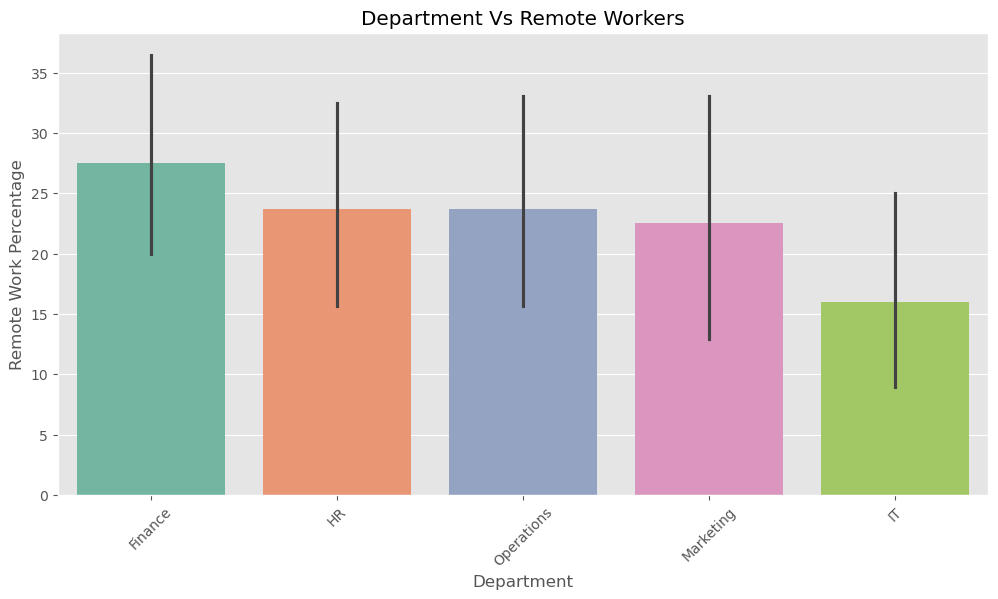

In [26]:
# Setting the size of the visualization
plt.figure(figsize=(12,6))

# plotting a bar plot
sns.barplot(data=df, x="Department", y="Remote_Work_Percentage", palette="Set2",
           order=df.groupby("Department")["Remote_Work_Percentage"].mean().sort_values(ascending=False).index)

# Adding title and labels
plt.title("Department Vs Remote Workers")
plt.xlabel("Department")
plt.ylabel("Remote Work Percentage")
plt.xticks(rotation=45)

plt.show()

### Observations
The Finance department has the highest number of remote workers compared to other departments while the IT department has the lowest.

### Perform ANOVA to test :

#### i. Whether work experience influences the salary amount for the employees.

In [29]:
# Categorizing Work Experience into bins (you can adjust the bins as needed)
bins = [0, 5, 10, 20, 30, 40]
labels = ['0-5', '6-10', '11-20', '21-30', '31-40']
df['Work_Experience_Category'] = pd.cut(df['Work_Experience'], bins=bins, labels=labels, right=False)

# Grouping monthly salary by Work Experience Categories
Work_Experience_Categories_groups = [df[df["Work_Experience_Category"] == category]["Monthly_Salary"] for category in df["Work_Experience_Category"].unique()]

# Null Hypothesis - Work experience does not affect monthly salary
# Significance level - 0.05

# Performing ANOVA
f_stat, p_value = stats.f_oneway(*Work_Experience_Categories_groups)

# Checking the result
print(f"ANOVA Results for Work Experience vs Salary:")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Work experience significantly influences the salary.")
else:
    print("Work experience does not significantly influence the salary.")

ANOVA Results for Work Experience vs Salary:
F-statistic: 0.29494689412137787
P-value: 0.8810128804696872
Work experience does not significantly influence the salary.


#### ii. Whether education level influences the salary amount for the employees.

In [31]:
# Null Hypothesis - Education level does not affect monthly salary
# Significance level - 0.05

# Grouping monthly salary by education level
monthly_salary_groups = [df[df["Education_Level"] == category]["Monthly_Salary"] for category in df["Education_Level"].unique()]

# Performing ANOVA 
f_stat, p_value = stats.f_oneway(*monthly_salary_groups)

# Checking the result
print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Education level significantly influences the salary.")
else:
    print("Education level does not significantly influence the salary.")


ANOVA F-statistic: 0.6941
P-value: 0.5567
Education level does not significantly influence the salary.


#### iii. The interaction effect for Education Level and Work Experience  on the salary.

### Conclusions
- There's no statistically significant difference between the salary distributions of the different education levels.
- There is no  difference in salaries across various levels of work experience.


### Create a box plot showing salary distributions across different job titles.

In [35]:
df.groupby("Job_Title")["Monthly_Salary"].describe()

,count,mean,std,min,25%,50%,75%,max
Job_Title,,,,,,,,
Analyst,45.0,78911.111111,18620.397201,48000.0,66000.0,78000.0,93000.0,131000.0
Consultant,40.0,77625.000000,18900.125491,43000.0,65000.0,77000.0,93250.0,112000.0
Data Scientist,35.0,87457.142857,18224.648560,50000.0,77000.0,88000.0,101000.0,127000.0
Engineer,44.0,80772.727273,18177.245725,38000.0,68750.0,81500.0,91500.0,123000.0
Manager,36.0,85638.888889,18243.046077,39000.0,75000.0,81500.0,95750.0,129000.0


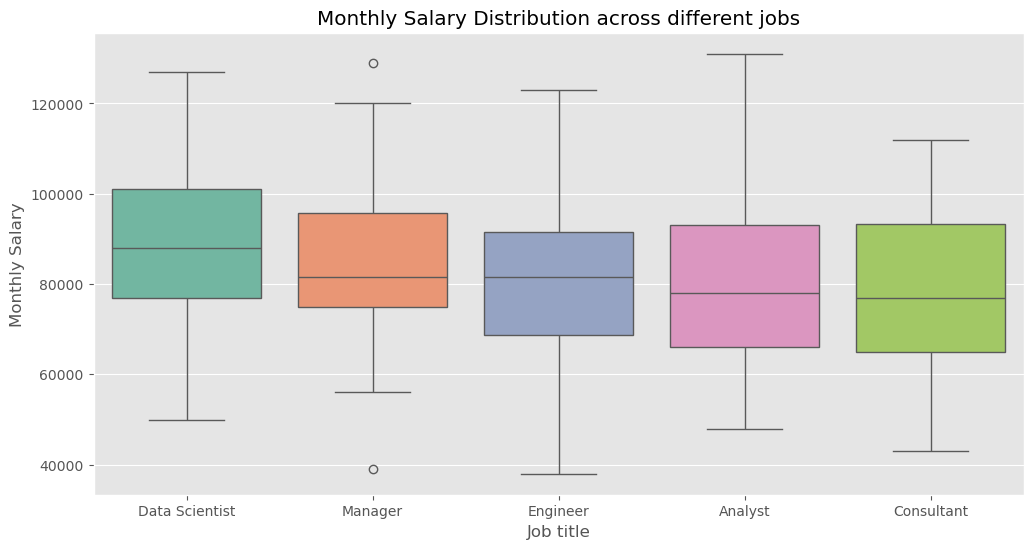

In [36]:
# Setting the size of the visualization
plt.figure(figsize=(12,6))
# Plotting a box plot 
sns.boxplot(data=df, x="Job_Title", y="Monthly_Salary", palette="Set2",
            order=df.groupby("Job_Title")["Monthly_Salary"].mean().sort_values(ascending=False).index)

# adding the title and labels
plt.title('Monthly Salary Distribution across different jobs')
plt.xlabel('Job title')
plt.ylabel("Monthly Salary")

plt.show()

### Observations
Data scientists have the highest average monthly salary as compared to other job titles.
Managers have extremely low and extremely high average monthly salary .

### Develop a heatmap to visualize correlations among numeric variables.

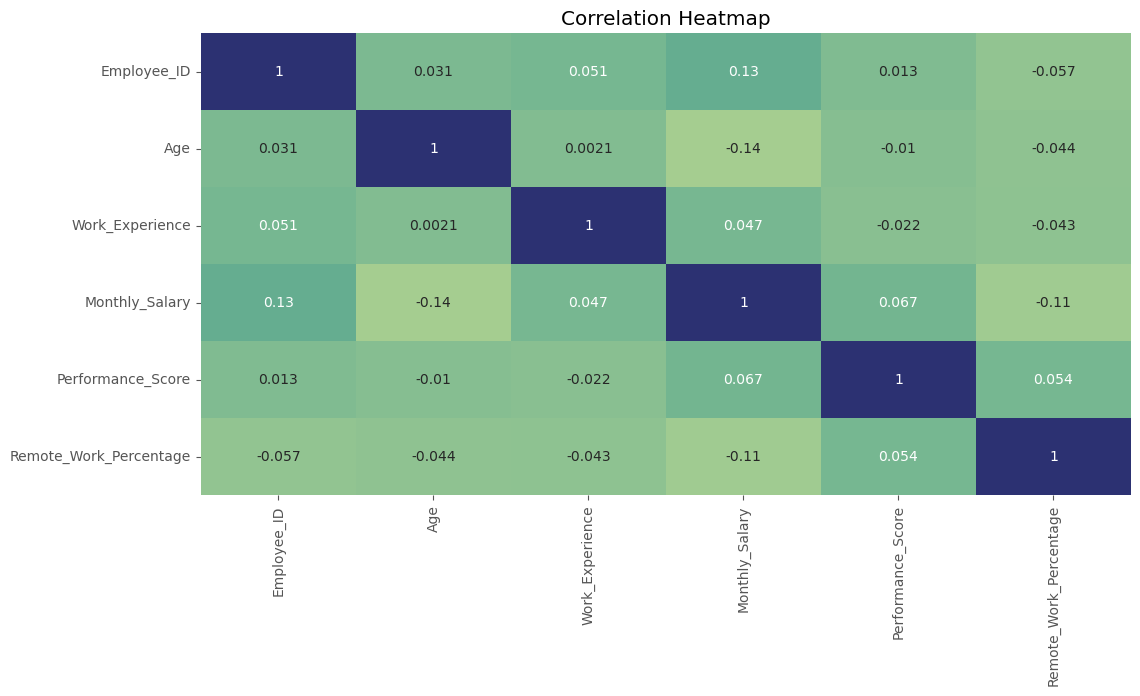

In [38]:
# Selecting numerical columns
numerical_columns = df.select_dtypes("number")

# Calculating the correlation
corr_matrix = numerical_columns.corr()

# Setting the size of the plot
plt.figure(figsize=(12,6))

# Plotting a correlation heatmap
sns.heatmap(corr_matrix,linecolor="black",cmap="crest", annot=True,cbar=False)

# Adding title and labels
plt.title("Correlation Heatmap")

plt.show()

### How does location affect monthly salary

In [40]:
df.groupby("City")["Monthly_Salary"].describe()

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Eldoret,45.0,84111.111111,17543.740430,46000.0,72000.0,88000.0,97000.0,122000.0
Kisumu,31.0,81516.129032,20944.165405,39000.0,71000.0,80000.0,96500.0,129000.0
Mombasa,39.0,84051.282051,20531.040323,43000.0,68000.0,82000.0,93500.0,131000.0
Nairobi,37.0,80162.162162,17388.555485,46000.0,69000.0,82000.0,90000.0,120000.0
Nakuru,48.0,79125.000000,17635.342899,38000.0,70250.0,78500.0,90250.0,111000.0


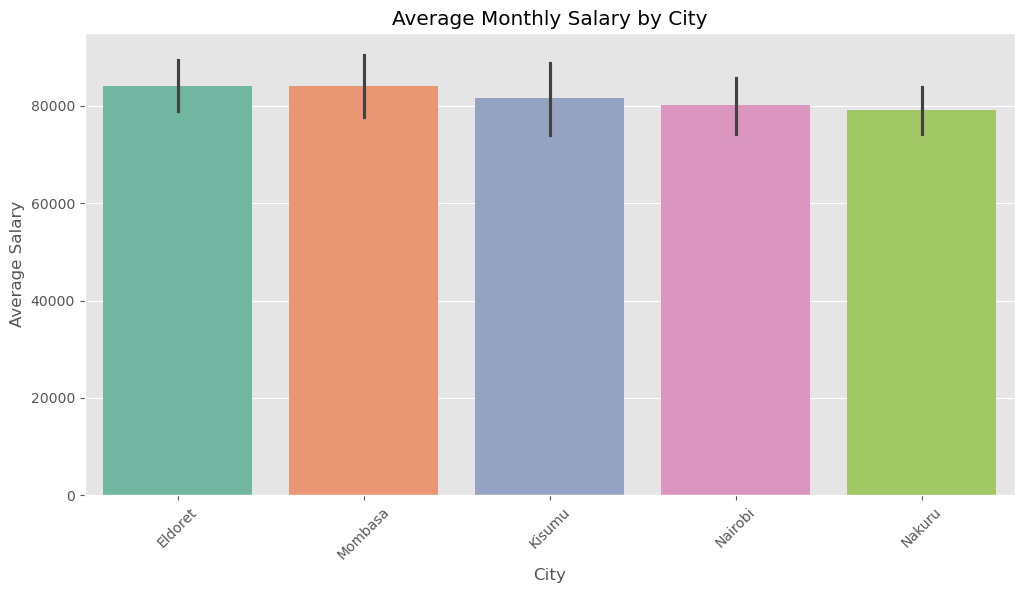

In [41]:
# Setting the size of the visualization
plt.figure(figsize=(12,6))

# plotting a bar plot
sns.barplot(data=df, x="City", y="Monthly_Salary", palette="Set2",
           order=df.groupby("City")["Monthly_Salary"].mean().sort_values(ascending=False).index)

# Adding title and labels
plt.title("Average Monthly Salary by City")
plt.xlabel("City")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)

plt.show()

### What key factors influence salary levels in this dataset?
1. Job title
2. Educational Level
3. Gender
4. Department
5. City

### What insights can HR use to improve salary structures and hiring policies?
1. The HR should consider supporting employees to advance their education so as to improve their capabilites which would lead to an increase in salary.
2. The HR should consider pay equality among all genders to ensure fairness and explore if the high paying jobs are held more by one gender.
3. The HR should review salary of people in different location to ensure fairness.